# Using Data Analysis & Visualization to Understand the Performance of NCAA Division 1 College Basketball Teams in March Madness
By Ananya Ramkumar, Nidhi Yabannavar, and Jessica Yeager, Fall 2020

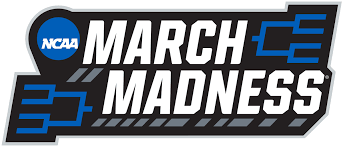

Source: NCAA

# Introduction
## Motivation

Every year, 64 collegiate basketball teams come together to partake in one of the most famous sporting events in the United States: the NCAA Division I Men’s Basketball Tournament, also known as March Madness. A total of 63 games are played in this postseason finale in a single-game elimination style, where games are determined based on teams’ “seeds”, a ranking predetermined by their regular season performance. While one may expect that the highest seeds may have a better chance of winning, history has shown that this is not always the case. 

Over 70 million brackets, which are attempts to correctly predict the outcome of the 63 games, are filled out by Americans each year. However, no one has ever filled out a perfect bracket. In fact, the odds of picking all 63 games correctly are 1 in 9.2 quintillion [1]. The excitement and uncertainty surrounding the outcome of the tournament has resulted in a pop culture phenomenon, where Americans wager around $8-$10 billion dollars on the results each year [2].


As college basketball fanatics and individuals who have filled out brackets for years, we thought it
would be interesting to explore what factors affect the March
Madness performance of different NCAA Division I Basketball teams, by visualizing and analyzing
their regular season data and tournament seed from the past few years. This analysis will help
us build a model to try to improve predictions in order to achieve our goal of creating the perfect
bracket. In this tutorial, we will be covering the process of collecting and tidying data, performing
exploratory data analysis, and creating a model to predict teams’ March Madness performance
based on their tournament seed and season record.

By the end of this tutorial you will be able to:
1. Collect data from a csv.
2. Parse, clean, and manage data.
3. Graph the relationships between attributes of a dataset.
4. Build a classification model

## Libraries and Tools

We will be using the following libraries and tools throughout the project. To install these libraries in your own development environment, use $ pip3 install [package]. We've also linked the documentation for each library for further information.

- pandas: for creating/working with dataframes -
[docs](https://pandas.pydata.org/docs/)
- numpy: to support multi-dimensional arrays and high-level math functions -
[docs](https://numpy.org/doc/stable/)
- folium: for visualizing geospatial data -
[docs](https://python-visualization.github.io/folium/)
- sklearn: for classification, regression, modelling, and other machine learning algorithms -
[docs](https://scikit-learn.org/stable/)
- matplotlib: to create graphs -
[docs](https://matplotlib.org/)
- seaborn: to create graphs -
[docs](https://seaborn.pydata.org/)
- statsmodels.api: for statistical models -
[docs](https://www.statsmodels.org/stable/index.html)

In [1]:
# importing libraries & tools
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, validation_curve, cross_val_score
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import requests
import seaborn as sns
from bs4 import BeautifulSoup
import statsmodels.api as sm

## Helpful Readings

#### For March Madness:
We found the following readings useful in preparation for this tutorial. The first link is a reading on how the NCAA 
assigns teams' their seeds. The second link is a guide to the schedule of the tournament, how all 63 games are 
divided into rounds, and various other terminologies and facts about the March Madness tournament.

[Principles and Procedures for Establishing the Bracket](https://www.ncaa.com/sites/default/files/files/BracketPrin-Proc10-5-10.pdf)

[What is March Madness: The NCAA tournament explained](https://www.ncaa.com/news/basketball-men/bracketiq/2020-04-20/what-march-madness-ncaa-tournament-explained)

#### For Classification and Machine Learning:
This link is a tutorial we found extremely helpful for building a random forest classification model.

[Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

## Part 1: Data Curation

The initial step for this final project is to collect/curate data.

To analyze factors that affect a team's performance in the March Madness tournament, we chose to use a pre-existing dataset we found online. The first dataset that we were able to find online was from Kaggle, and it is a collection of data from the 2015, 2016, 2017, 2018, 2019, 2020 Division I college basketball seasons (https://www.kaggle.com/andrewsundberg/college-basketball-dataset). It contains data about each team per season regarding the number of games played and number of games won. It also contains metadata about game play like effective field goal percentage shot and effective free throw percentage. Another parameter of note is the 'seed' column, which presents the preliminary ranking of the teams in the NCAA March Madness Tournament.

This dataset seems to have a lot of great data for us to analyze and predict what factors make a certain basketball team more successful than another. We are going to start the curation with a pandas dataframe for this dataset.

In [2]:
# bringing in the data set acquired from kaggle
basketball = pd.read_csv("cbb.csv")
basketball.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


## Part 2: Data Parsing & Management

Before we introduce our data set, we will define some key basketball terminology that is used extensively throughout our analysis.
1) "Allowed" - Term used to describe when the opposing team scores or makes a play against the team that we are looking at 

2) "Seed" - Ranking given to each team for the NCAA tournament. There are 16 seeds, seed 1 being the best ranking teams and 16 being the worst ranking teams. There are 4 teams per seed.
[Basketball Seeding](http://www.ncaa.org/about/resources/media-center/mens-basketball-selections-101-bracket)

3) "Free Throw" - An unopposed attempt to score points behind the free throw line, often given to players who have received a foul. 

4) "Rebound" - Number of times a player retrieves the ball after a missed shot.

5) “Two-Point” - Any shot made from inside the 3-point line (22 feet away from the basket). Players are awarded 2 points for these shots.

6) “Three-Point” - Any shot made from outside the 3-point line (22 feet away from the basket). Players are awarded 3 points for these shots.

7) “Turnover” - When a team loses possession of the ball to the opposing team (ex. Throwing the ball out of bounds).

More terminology can be read up from this source -> [Basketball Terminology](http://web.mst.edu/~ima/Rules/basketballrules.html)

### Initial Data Cleaning

The next step is to clean the dataset so that we handle missing data, make sure every column is labeled with understandable names, and reorganize the data so that we get rid of any columns that do not fit into our data analysis.

Below are the descriptions variables in the dataset. We will decide which ones are worth keeping and remove the colums that do not pertain to our analysis. If we are planning on removing one of the following column from the dataset, we will notate it next to the variable description. 

CONF: The Athletic Conference in which the school participates in

G: Number of games played

W: Number of games won

ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)

ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)

BARTHAG: Power Rating (Chance of beating an average Division I team) -> REMOVING, this variable is not related to our study

EFG_O: Effective Field Goal Percentage Shot

EFG_D: Effective Field Goal Percentage Allowed -> REMOVING, this variable is too similar to the one directly below it

TOR: Turnover Percentage Allowed (Turnover Rate)

TORD: Turnover Percentage Committed (Steal Rate) -> REMOVING, this variable is too similar to the one directly above it

ORB: Offensive Rebound Rate

DRB: Offensive Rebound Rate Allowed

FTR : Free Throw Rate (How often the given team shoots Free Throws)

FTRD: Free Throw Rate Allowed -> REMOVING, this variable is too similar to the one directly above it

2P_O: Two-Point Shooting Percentage

2P_D: Two-Point Shooting Percentage Allowed

3P_O: Three-Point Shooting Percentage -> REMOVING, this variable is too similar to the one directly below it

3P_D: Three-Point Shooting Percentage Allowed

ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo) -> REMOVING, this variable doesn't give us much information for analysis

WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it) -> REMOVING, this variable doesn't give us any more information than the number of games won does

POSTSEASON: Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)

SEED: Seed in the NCAA March Madness Tournament

In [3]:
# drop columns that will not be used in this tutorial
basketball = basketball.drop(columns=['BARTHAG', 'EFG_D', 'TORD', 'FTRD', 'ADJ_T', 'WAB'])
basketball.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,EFG_O,TOR,ORB,DRB,FTR,2P_O,2P_D,3P_O,3P_D,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,52.6,15.4,40.7,30.0,32.3,53.9,44.6,32.7,36.2,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,54.8,12.4,32.1,23.7,36.2,54.8,44.7,36.5,37.5,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,53.9,14.0,25.5,24.9,30.7,54.7,46.8,35.2,33.2,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,53.5,17.7,27.4,28.7,32.9,52.8,41.9,36.5,29.7,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,56.6,16.2,30.0,26.2,39.0,56.3,40.0,38.2,29.0,2ND,1.0,2017


Right now, the columns have labels that do not make much sense unless looking at the definitions for each column.
So, now that we have removed columns that don't mean much to us with respect to our analysis, we will rename the remaining columns so that they are more understandable when looking directly at the dataframe. We will also break down some of the column terms into non-basketball lingo so that it is easy for all people to understand.

In [4]:
# renaming the data frame columns for more accurate descriptions
basketball.columns = ['TEAM', 'CONFERENCE', 'NUM GAMES PLAYED', 'NUM GAMES WON', 'ADJ OFFENSIVE EFFICIENCY', 'ADJ DEFENSIVE EFFICIENCY', 'FIELD GOAL %', 'TURNOVER RT', 'OFFENSIVE REBOUND RT', 'OFFENSIVE REBOUND RT ALLOWED', 'FREE THROW RT', '2 PT SHOOTING %', '2 PT SHOOTING % ALLOWED', '3 PT SHOOTING %', '3 PT SHOOTING % ALLOWED', 'MM ELIMINATION ROUND', 'SEED', 'YEAR']
basketball.head()

,TEAM,CONFERENCE,NUM GAMES PLAYED,NUM GAMES WON,ADJ OFFENSIVE EFFICIENCY,ADJ DEFENSIVE EFFICIENCY,FIELD GOAL %,TURNOVER RT,OFFENSIVE REBOUND RT,OFFENSIVE REBOUND RT ALLOWED,FREE THROW RT,2 PT SHOOTING %,2 PT SHOOTING % ALLOWED,3 PT SHOOTING %,3 PT SHOOTING % ALLOWED,MM ELIMINATION ROUND,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,52.6,15.4,40.7,30.0,32.3,53.9,44.6,32.7,36.2,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,54.8,12.4,32.1,23.7,36.2,54.8,44.7,36.5,37.5,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,53.9,14.0,25.5,24.9,30.7,54.7,46.8,35.2,33.2,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,53.5,17.7,27.4,28.7,32.9,52.8,41.9,36.5,29.7,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,56.6,16.2,30.0,26.2,39.0,56.3,40.0,38.2,29.0,2ND,1.0,2017


Now, we are going to compute the percentage of games won out of the total games played by a team and make a new column for this calculation. This column is more valuable than having 2 separate colums for Number of Games Played and Number of Games Won because it is difficult to compare teams' likelihood of success in March Madness based off of a different number of games played.

In [5]:
# This new column will allow us to find correlations based on a basketball team season successes
basketball['GAME WIN %'] = basketball['NUM GAMES WON'] / basketball['NUM GAMES PLAYED']
basketball.head()

,TEAM,CONFERENCE,NUM GAMES PLAYED,NUM GAMES WON,ADJ OFFENSIVE EFFICIENCY,ADJ DEFENSIVE EFFICIENCY,FIELD GOAL %,TURNOVER RT,OFFENSIVE REBOUND RT,OFFENSIVE REBOUND RT ALLOWED,FREE THROW RT,2 PT SHOOTING %,2 PT SHOOTING % ALLOWED,3 PT SHOOTING %,3 PT SHOOTING % ALLOWED,MM ELIMINATION ROUND,SEED,YEAR,GAME WIN %
0,North Carolina,ACC,40,33,123.3,94.9,52.6,15.4,40.7,30.0,32.3,53.9,44.6,32.7,36.2,2ND,1.0,2016,0.825000
1,Wisconsin,B10,40,36,129.1,93.6,54.8,12.4,32.1,23.7,36.2,54.8,44.7,36.5,37.5,2ND,1.0,2015,0.900000
2,Michigan,B10,40,33,114.4,90.4,53.9,14.0,25.5,24.9,30.7,54.7,46.8,35.2,33.2,2ND,3.0,2018,0.825000
3,Texas Tech,B12,38,31,115.2,85.2,53.5,17.7,27.4,28.7,32.9,52.8,41.9,36.5,29.7,2ND,3.0,2019,0.815789
4,Gonzaga,WCC,39,37,117.8,86.3,56.6,16.2,30.0,26.2,39.0,56.3,40.0,38.2,29.0,2ND,1.0,2017,0.948718


Next, we will compute the defensive rebound rate for each team. This can be done by taking the offensive rebound rate allowed, which is the amount of rebounds the teams' defense gave up, and subtracting this value from 100. This will give us the percentage of rebounds that the teams' defense did not give up.

In [6]:
# creates new column that shows the teams defense's success in obtaining rebounds
basketball['DEFENSIVE REBOUND RT'] = 100 - basketball['OFFENSIVE REBOUND RT ALLOWED']
basketball.head()

,TEAM,CONFERENCE,NUM GAMES PLAYED,NUM GAMES WON,ADJ OFFENSIVE EFFICIENCY,ADJ DEFENSIVE EFFICIENCY,FIELD GOAL %,TURNOVER RT,OFFENSIVE REBOUND RT,OFFENSIVE REBOUND RT ALLOWED,FREE THROW RT,2 PT SHOOTING %,2 PT SHOOTING % ALLOWED,3 PT SHOOTING %,3 PT SHOOTING % ALLOWED,MM ELIMINATION ROUND,SEED,YEAR,GAME WIN %,DEFENSIVE REBOUND RT
0,North Carolina,ACC,40,33,123.3,94.9,52.6,15.4,40.7,30.0,32.3,53.9,44.6,32.7,36.2,2ND,1.0,2016,0.825000,70.0
1,Wisconsin,B10,40,36,129.1,93.6,54.8,12.4,32.1,23.7,36.2,54.8,44.7,36.5,37.5,2ND,1.0,2015,0.900000,76.3
2,Michigan,B10,40,33,114.4,90.4,53.9,14.0,25.5,24.9,30.7,54.7,46.8,35.2,33.2,2ND,3.0,2018,0.825000,75.1
3,Texas Tech,B12,38,31,115.2,85.2,53.5,17.7,27.4,28.7,32.9,52.8,41.9,36.5,29.7,2ND,3.0,2019,0.815789,71.3
4,Gonzaga,WCC,39,37,117.8,86.3,56.6,16.2,30.0,26.2,39.0,56.3,40.0,38.2,29.0,2ND,1.0,2017,0.948718,73.8


Now we are going to take care of missing values. In this dataset, the only columns that have missing values are POSTSEASON AND SEED. The missing values in this dataset are currently denoted with an 'NA'.

In [7]:
# replacing NA with NaN
basketball['MM ELIMINATION ROUND'].replace('NA', np.NaN)
basketball['SEED'].replace('NA', np.NaN)
basketball.head()

,TEAM,CONFERENCE,NUM GAMES PLAYED,NUM GAMES WON,ADJ OFFENSIVE EFFICIENCY,ADJ DEFENSIVE EFFICIENCY,FIELD GOAL %,TURNOVER RT,OFFENSIVE REBOUND RT,OFFENSIVE REBOUND RT ALLOWED,FREE THROW RT,2 PT SHOOTING %,2 PT SHOOTING % ALLOWED,3 PT SHOOTING %,3 PT SHOOTING % ALLOWED,MM ELIMINATION ROUND,SEED,YEAR,GAME WIN %,DEFENSIVE REBOUND RT
0,North Carolina,ACC,40,33,123.3,94.9,52.6,15.4,40.7,30.0,32.3,53.9,44.6,32.7,36.2,2ND,1.0,2016,0.825000,70.0
1,Wisconsin,B10,40,36,129.1,93.6,54.8,12.4,32.1,23.7,36.2,54.8,44.7,36.5,37.5,2ND,1.0,2015,0.900000,76.3
2,Michigan,B10,40,33,114.4,90.4,53.9,14.0,25.5,24.9,30.7,54.7,46.8,35.2,33.2,2ND,3.0,2018,0.825000,75.1
3,Texas Tech,B12,38,31,115.2,85.2,53.5,17.7,27.4,28.7,32.9,52.8,41.9,36.5,29.7,2ND,3.0,2019,0.815789,71.3
4,Gonzaga,WCC,39,37,117.8,86.3,56.6,16.2,30.0,26.2,39.0,56.3,40.0,38.2,29.0,2ND,1.0,2017,0.948718,73.8


Next, we are going to assign a March Madness ranking to each team. This ranking is determined by looking at their elimination round in the tournament. The winning team will recieve a rank of 7, second place team a rank of 6, Final Four teams a rank of 5, and so on. If a team did not qualify for the tournament, they will be assigned NaN for these rows.

In [8]:
# There are 1757 rows in our dataset, so we loop through all of them
MM_RANK = []
for x in basketball['MM ELIMINATION ROUND']:
    # We are replacing the Elimination Round value with an integer representing the number of teams left in the round
    # that the given team got eliminated in
    if x == "Champions":
        MM_RANK.append(7)
    elif x == "2ND":
        MM_RANK.append(6)
    elif x == "F4":
        MM_RANK.append(5)
    elif x == "E8":
        MM_RANK.append(4)
    elif x == "S16":
        MM_RANK.append(3)
    elif x == "R32":
        MM_RANK.append(2)
    elif x == "R64":
        MM_RANK.append(1)
    elif x == "R68":
        MM_RANK.append(0)
    else: # if the team did not qualify for the March Madness Tournament. We will assign NaN to these rows
        MM_RANK.append(np.NaN)

basketball["MM_RANK"] = MM_RANK
basketball

,TEAM,CONFERENCE,NUM GAMES PLAYED,NUM GAMES WON,ADJ OFFENSIVE EFFICIENCY,ADJ DEFENSIVE EFFICIENCY,FIELD GOAL %,TURNOVER RT,OFFENSIVE REBOUND RT,OFFENSIVE REBOUND RT ALLOWED,...,2 PT SHOOTING %,2 PT SHOOTING % ALLOWED,3 PT SHOOTING %,3 PT SHOOTING % ALLOWED,MM ELIMINATION ROUND,SEED,YEAR,GAME WIN %,DEFENSIVE REBOUND RT,MM_RANK
0,North Carolina,ACC,40,33,123.3,94.9,52.6,15.4,40.7,30.0,...,53.9,44.6,32.7,36.2,2ND,1.0,2016,0.825000,70.0,6.0
1,Wisconsin,B10,40,36,129.1,93.6,54.8,12.4,32.1,23.7,...,54.8,44.7,36.5,37.5,2ND,1.0,2015,0.900000,76.3,6.0
2,Michigan,B10,40,33,114.4,90.4,53.9,14.0,25.5,24.9,...,54.7,46.8,35.2,33.2,2ND,3.0,2018,0.825000,75.1,6.0
3,Texas Tech,B12,38,31,115.2,85.2,53.5,17.7,27.4,28.7,...,52.8,41.9,36.5,29.7,2ND,3.0,2019,0.815789,71.3,6.0
4,Gonzaga,WCC,39,37,117.8,86.3,56.6,16.2,30.0,26.2,...,56.3,40.0,38.2,29.0,2ND,1.0,2017,0.948718,73.8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,SEC,35,22,111.2,94.7,51.4,19.2,33.9,27.3,...,52.5,45.7,32.9,32.6,S16,7.0,2018,0.628571,72.7,3.0
1753,LSU,SEC,35,28,117.9,96.6,51.2,17.9,36.7,30.8,...,52.9,49.4,31.9,33.7,S16,3.0,2019,0.800000,69.2,3.0
1754,Tennessee,SEC,36,31,122.8,95.2,55.3,15.8,31.6,30.2,...,55.4,44.7,36.7,35.4,S16,2.0,2019,0.861111,69.8,3.0
1755,Gonzaga,WCC,35,27,117.4,94.5,55.2,17.1,32.1,26.0,...,54.3,44.4,37.8,30.3,S16,11.0,2016,0.771429,74.0,3.0


Lastly, we are going to make a second dataframe solely consisting of teams who qualified for the March Madness tournament. This is a dataframe we will be using for all of our EDA and modelling.

In [9]:
# Here we make a second dataframe removing the teams (rows) that didn't qualify for the March Madness tournament
rank_bb = basketball
rank_bb.dropna(inplace=True) #default is how='any' in axis=0 (rows)
rank_bb.shape

(340, 21)

## Part 3: Exploratory Analysis & Data Visualization

Now our data is ready to be analyzed! By the end of our EDA, we want to have a clear idea of what factors most affect a team's standing in the March Madness Tournament. For this, we will be using MM_RANK (the round of March Madness that the team was eliminated in) to compare how various regular season statistics like GAME WIN percentage, SHOOTING percentage, and TURNOVER RATE predict a team's success in the tournament. We will begin by doing a few initial analyses with the data. This will allow us to observe trends and relationships between individual predictors and our response variable.

We will start by observing the relationship between the teams' winning percentage and their tournament ranking using a scatter plot.

Text(0, 0.5, 'Elimination Round')

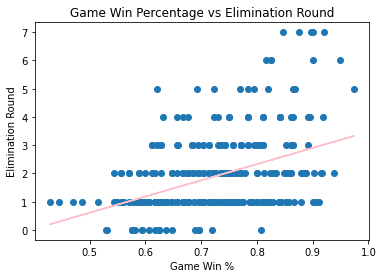

In [10]:
# setting y-values in the scatter plot to March Madness rank values
yCoefficient = rank_bb['MM_RANK'].values
# setting x-values in the scatter plot to game win % values
xCoefficient = rank_bb['GAME WIN %'].values
figures, axis = plt.subplots()
axis.scatter(xCoefficient, yCoefficient)
# finding the slope and y-intercept
b, m = polyfit(xCoefficient, yCoefficient, 1)
# graphing the line of fit
plt.plot(xCoefficient, np.multiply(m, xCoefficient) + b, color = 'pink')
plt.title("Game Win Percentage vs Elimination Round")
plt.xlabel("Game Win %")
plt.ylabel("Elimination Round")

Based on the scatterplot, we can see that the teams who get eliminated first have a lower game win percentage, whereas the teams who get eliminated later in the tournament tend to have a higher game win percentage. 

Now, we are going to determine the relationship between 2 point shooting %, 3 point shooting %, and success in the tournament.

Text(0, 0.5, 'Elimination Round')

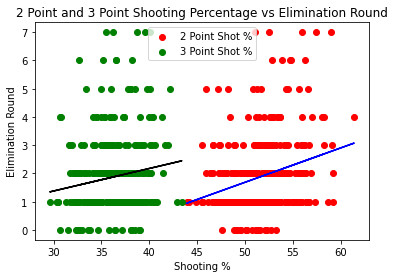

In [11]:
# setting y-values in the scatter plot to March Madness rank values
yCoefficient = rank_bb['MM_RANK'].values
# setting the 1st set of x values to 2 pt shooting % values
x1Coefficient = rank_bb['2 PT SHOOTING %'].values
# setting the 2nd set of x values to 3 pt shooting % values
x2Coefficient = rank_bb['3 PT SHOOTING %'].values
figures, axis = plt.subplots()
# create scatter plot on same plot
axis.scatter(x1Coefficient, yCoefficient, color = "red", label = "2 Point Shot %")
axis.scatter(x2Coefficient, yCoefficient, color = "green", label = "3 Point Shot %")
# finding the slope and y-intercept for both sets of data
b1, m1 = polyfit(x1Coefficient, yCoefficient, 1)
b2, m2 = polyfit(x2Coefficient, yCoefficient, 1)
# plotting the line of best fit for both sets of data
plt.plot(x1Coefficient, np.multiply(m1, x1Coefficient) + b1, color = 'blue')
plt.plot(x2Coefficient, np.multiply(m2, x2Coefficient) + b2, color = 'black')
axis.legend()
plt.title("2 Point and 3 Point Shooting Percentage vs Elimination Round")
plt.xlabel("Shooting %")
plt.ylabel("Elimination Round")

Looking at this plot, it makes sense that as the shooting percentage increases, the higher of a ranking the team has and the further a team progresses in the tournament. Additionally, the 2 Point Shooting Percentage has a range of 40% to 63% whereas the 3 Point Shooting Percentage has a range of 28% to 40%. This makes sense because scoring a 3 Point shot is significantly harder than scoring a 2 Point shot.

To gain more perspective on how a teams' defensive strategy plays a role in their success at the tournament, we are going to determine the relationship between 2 point shooting % allowed, 3 point shooting % allowed, and ranking in the tournment.

Text(0, 0.5, 'Elimination Round')

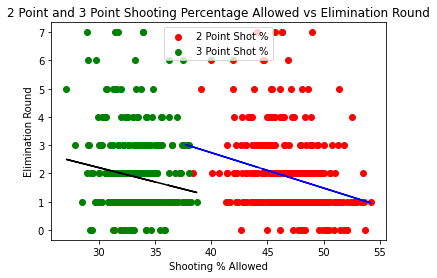

In [12]:
# setting y-values in the scatter plot to March Madness rank values
yCoefficient = rank_bb['MM_RANK'].values
# setting the 1st set of x values to 2 pt shooting % values allowed
x1Coefficient = rank_bb['2 PT SHOOTING % ALLOWED'].values
# setting the 2nd set of x values to 3 pt shooting % values allowed
x2Coefficient = rank_bb['3 PT SHOOTING % ALLOWED'].values
figures, axis = plt.subplots()
# create scatter plot on same plot
axis.scatter(x1Coefficient, yCoefficient, color = "red", label = "2 Point Shot %")
axis.scatter(x2Coefficient, yCoefficient, color = "green", label = "3 Point Shot %")
# finding the slope and y-intercept for both sets of data
b1, m1 = polyfit(x1Coefficient, yCoefficient, 1)
b2, m2 = polyfit(x2Coefficient, yCoefficient, 1)
# plotting the line of best fit for both sets of data
plt.plot(x1Coefficient, np.multiply(m1, x1Coefficient) + b1, color = 'blue')
plt.plot(x2Coefficient, np.multiply(m2, x2Coefficient) + b2, color = 'black')
axis.legend()
plt.title("2 Point and 3 Point Shooting Percentage Allowed vs Elimination Round")
plt.xlabel("Shooting % Allowed")
plt.ylabel("Elimination Round")

Based on the scatterplot, we can see there is a negative relationship between shooting % allowed and elimination round. In general, the higher the shooting % allowed, the lower the elimination round. In other words, the more points a team lets their opponent score, the quicker they will be eliminated from the tournament. This aligns with our expectations, as we expected that teams make it to the later rounds tend to have better defense.

Next, we are going to examine the relationship between Turnover Rate and Elimination Round. 

Text(0, 0.5, 'Elimination Round')

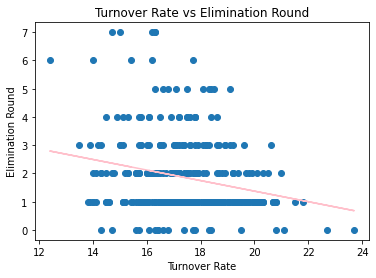

In [13]:
# setting y-values in the scatter plot to March Madness rank values
yCoefficient = rank_bb['MM_RANK'].values
# setting x-values in the scatter plot to turnover rate values
xCoefficient = rank_bb['TURNOVER RT'].values
figures, axis = plt.subplots()
axis.scatter(xCoefficient, yCoefficient)
# finding the slope and y-intercept
b, m = polyfit(xCoefficient, yCoefficient, 1)
# plotting the line of best fit
plt.plot(xCoefficient, np.multiply(m, xCoefficient) + b, color = 'pink')
plt.title("Turnover Rate vs Elimination Round")
plt.xlabel("Turnover Rate")
plt.ylabel("Elimination Round")

Here, we see that Turnover Rate and Elimination Round are negatively correlated. This is consistent with our expectations because a turnover is whenever a team gives up/loses control of the ball to the other team. Therefore, we would expect a better team to have a lower Turnover Rate.

Now, we are going to examine the relationship between offensive rebound rate and ranking in the tournament.

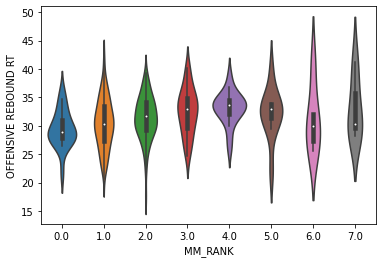

In [14]:
# using seaborn to create a violin plot
ax = sns.violinplot(x='MM_RANK', y='OFFENSIVE REBOUND RT', data=rank_bb)

Looking at the violin plot, we can see that for the teams that were eliminated the earliest (in R68 or R64), their offensive rebound rate was between 18% and 40%. For the teams that made it to the last few rounds (2nd or Champions), their offensive rebound rate was far more spread out, ranging from 18% to 50%. Although some of the higher ranking teams have low offensive rebound rates, their success could be attributed other factors, including defensive rebound rates. 

Thus, we will now examine the relationship between defensive rebound rate and championship sucess.

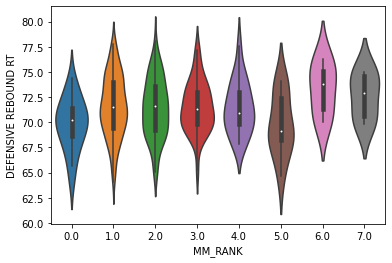

In [15]:
# using seaborn to create a violin plot
ax = sns.violinplot(x='MM_RANK', y='DEFENSIVE REBOUND RT', data=rank_bb)

Looking at this violin plot, we can see that the ranges for the defensive rebound rate for the teams that were eliminated from the tournament first are between 61% and 77%. For the championship teams, the defensive rebound rate is a range from 66% to 77.5%. Additionally, the most dense area for teams that were elinimated in the first 5 rounds (R68, R64, R32, S16, E8) is around 70%. For the teams that played in the championship game (Champion and 2nd), the most dense area was around 75%. 

Next, in order examine the relationship between free throw rates and March Madness success, we will perform an OLS regression on these 2 variables.

In [16]:
# creating a simple OLS
# setting dependent variable as March Madness rank and independent variable as free throw rate
YVar = rank_bb[['MM_RANK']]
XVar = rank_bb[['FREE THROW RT']]
XVar = sm.add_constant(XVar)
# finding the Linear Regression Model
LinearModel = sm.OLS(YVar, XVar, missing='drop').fit()
print(LinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:                MM_RANK   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.536
Date:                Mon, 21 Dec 2020   Prob (F-statistic):             0.0339
Time:                        15:31:38   Log-Likelihood:                -590.09
No. Observations:                 340   AIC:                             1184.
Df Residuals:                     338   BIC:                             1192.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.0432      0.557      5.463

Based off the OLS regression, we can see that our regression equation is rank = 3.0432 + -0.0327*FREE THROW RT.
This means that the free throw rate and march madness ranking are negatively correlated. Teams who were eliminated from the tournament in the first rounds have a higher free throw rate than others. However, the R-Squared value is 0.013, which is very low, meaning that this regression equation is not a good fit for our model. Therefore, free throw rt has very little predictive effect.

Now we are going to use box plots to analyze the relationship between offensive effeciency and team performance, as well as defensive effeciency and team performance in March Madness. For clarification, offensive efficiency is an estimate of the number of points scored per 100 possessions a team would have against the average Division I defense.
Defensive efficiency is an estimate of the number of points a team would "give up" to the average Division I offense.

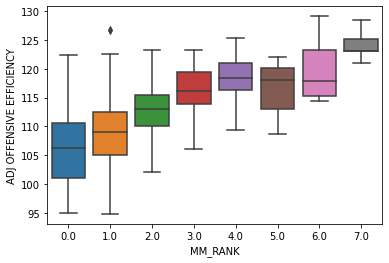

In [17]:
# creates a boxplot for each MM_rank caregory and compares it against teams ADJ OFFENSIVE EFFICIENCY
ax = sns.boxplot(x="MM_RANK", y="ADJ OFFENSIVE EFFICIENCY", data=rank_bb)

Based on the box plot, we can see that as the March Madness rank increases, or the better teams do in the tournament, the higher median adjancent offensive efficiency the teams have. Teams who have won the whole tournament have a median offensive efficiency of around 125, while teams who lost within the first 2 rounds of the tournament have median offensive efficienies of 107 and 109 respectively. This aligns with our expectations, as teams that do better in the tournament would have a better offense in comparison to an average NCAA Division I team.

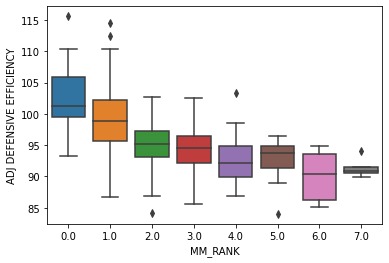

In [18]:
# creates a boxplot for each MM_rank caregory and compares it against teams ADJ DEFENSIVE EFFICIENCY
ax = sns.boxplot(x="MM_RANK", y="ADJ DEFENSIVE EFFICIENCY", data=rank_bb)

The box plot shows that as the March Madness rank increases, or the better teams do in the tournament, the lower median adjaceny defensive efficiency the teams have. Teams who have won the tournament or came in 2nd place have median defensive efficiencies of 92 and 91 respectively, while teams who lost within the first 2 rounds of the tournament have median offensive efficiences of 101 and 99 respectively. Once again, this aligns with our expectations, as teams that do better in the tournament would allow their opponents to score less points on them, therefore having a better defense in comparison to an average Division I team.

Our next goal is to find out which conferences feed the most teams to the March Madness Tournament.

Number of conferences that made it to March Madness: 32


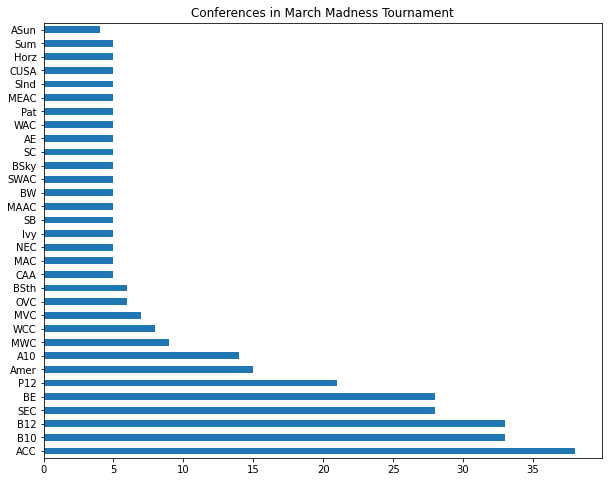

In [19]:
# Getting the total number of conferences that particiapte in NCAA March Madness
print("Number of conferences that made it to March Madness:",len(rank_bb['CONFERENCE'].unique()))
# counts the number of occurrence for each conference in the data frame
conference = rank_bb['CONFERENCE'].value_counts()
# creates a bar graph based on the values computed in the previous step
conference.plot(kind='barh', title= "Conferences in March Madness Tournament", figsize=(10, 8))

This bar graph allows us to visualize the amount of times teams from each conference have made it to the March Madness tournament. As we can see that about 6 conferences hold the majority of the tournament participants. This can possibly indicate that conference has an effect on tournament participation and success.

Next, we want to see which conferences the Final 4 teams come from.

Number of conferences that made it to Final 4: 8


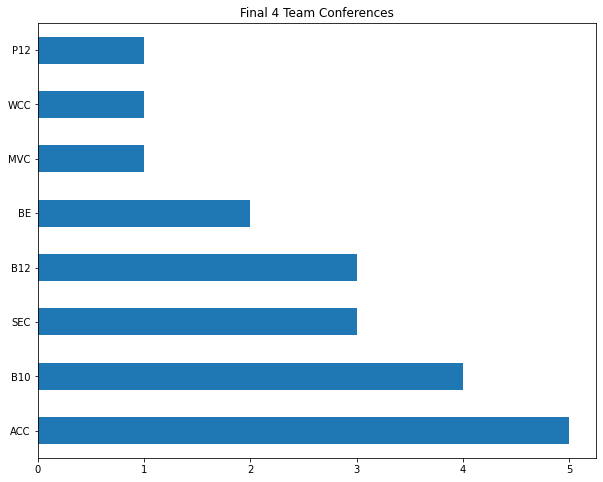

In [20]:
# Data frame of all teams that have played in a final 4 game or beyond.
winner = rank_bb[rank_bb['MM_RANK']>= 5]
# Getting the total number of conferences that made it to the Final Four round of March Madness
print("Number of conferences that made it to Final 4:",len(winner['CONFERENCE'].unique()))
# counts the number of occurrence in final four games for each conference in the data frame
F4conference = winner['CONFERENCE'].value_counts()
# creates a bar graph based on the values computed in the previous step
F4conference.plot(kind='barh', title= "Final 4 Team Conferences", figsize=(10, 8))

Above we visualize the conferences that make it to the final 4 or beyond in the March Madness tournament. Only 8 of the 32 conferences have made it this far in the past five years have made it this far. This can suggest that teams in these 8 conferences have a much higher chance of taking home the championship.

In order to gain a better understanding of what makes a team successful in the March Madness tournament, it's also important to analyze data specifically on teams who have made it far in the tournament. Thus, we want to analyze the game win percentage of teams who have made it to the Final Four round.

Text(0, 0.5, 'Elimination Round')

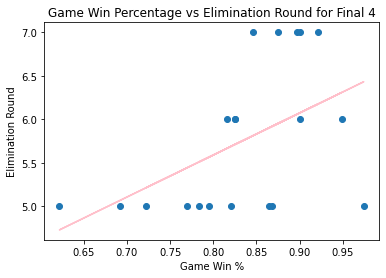

In [21]:
yCoefficient = winner['MM_RANK'].values
xCoefficient = winner['GAME WIN %'].values
figures, axis = plt.subplots()
axis.scatter(xCoefficient, yCoefficient)
b, m = polyfit(xCoefficient, yCoefficient, 1)
plt.plot(xCoefficient, np.multiply(m, xCoefficient) + b, color = 'pink')
plt.title("Game Win Percentage vs Elimination Round for Final 4")
plt.xlabel("Game Win %")
plt.ylabel("Elimination Round")

When we compare this to the graph of win percentage vs elimination round for seeds 1-16, we can see a clear difference. Only 1 team for all final 4 teams from 2015-2019 had a game win percentage below 70%, with many final 4 teams having game win percentages in the 80% to 90% range. In contrast, the graph for seeds 1-16 depicts many teams with a game win percentage between 50% to 70%. Interestingly, the team with the highest game win percentage, around 97%, only has a rank of 5, meaning that they lost in the Final 4 round. This shows that while a high game win percentage is beneficial to doing well in the tournament, it does not guarentee a win.

Next, we want to plot the conferences of the teams who have won from 2015-2019.

Number of conferences that won March Madness: 2


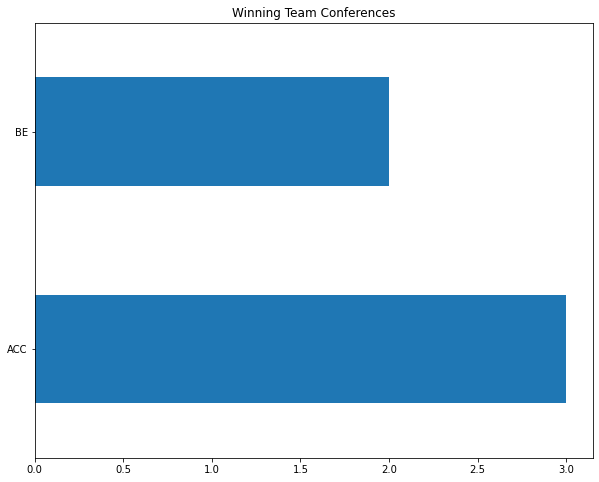

In [22]:
# Data frame of all teams that have played in won March Madness
winner = rank_bb[rank_bb['MM_RANK']>= 7]
# Getting the total number of conferences that won March Madness
print("Number of conferences that won March Madness:",len(winner['CONFERENCE'].unique()))
# counts the number of championships won for each conference in the data frame
winnerconference = winner['CONFERENCE'].value_counts()
# creates a bar graph based on the values computed in the previous step
winnerconference.plot(kind='barh', title= "Winning Team Conferences", figsize=(10, 8))

This bar graph depicts the conferences that have produced champion teams for March Madness in the past five years. As only 6.25% of all conferences have successfully won March Madness, it is more likely that a team from either ACC or BE will win the tournament compared to any other league.

Next, we want to learn more about the relationship between a team's seed and and their winning percentage, based on year. This will give us more insight on the relationship between these 2 variables in comparison to our previous scatterplot. In order to do this, we will use a line graph, with 16 lines to represent the 16 seeds. We will plot the winning percentage for each respecitive seed for each year from 2015 to 2019.

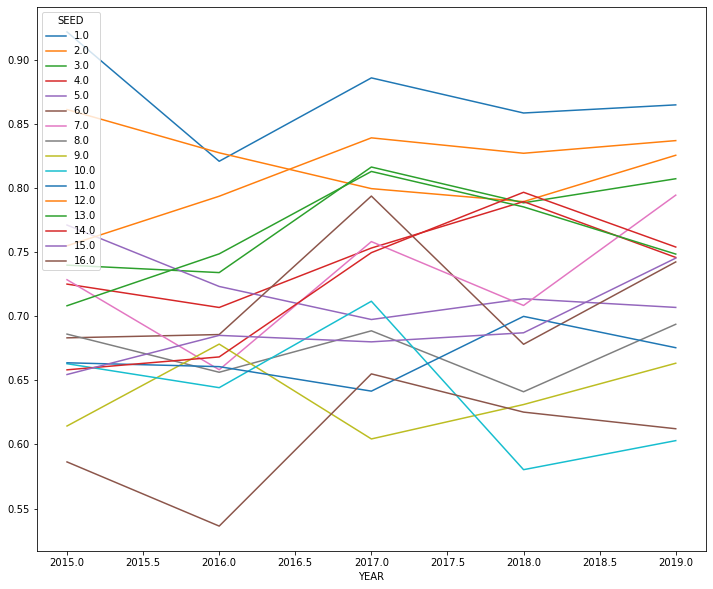

In [23]:
testing = rank_bb.groupby(['SEED', 'YEAR'])
test = testing['GAME WIN %'].mean()
test= test.unstack(level=0)
test.plot(figsize=(12, 10))

Based on the graph, we can see that teams with higher ranking tend to have higher winning percentage when compared to teams with lower winning percentage 

Lastly, we want to understand the relationship between a team's seed going into the March Madness tournament, and their success within the tournament. In order to do this, we will use a line graph, with 16 lines to represent the 16 seeds. We will plot the average March Madness Rank for each respecitive seed for each year from 2015 to 2019.

SEED  YEAR
1.0   2015    5.000000
      2016    4.500000
      2017    4.750000
      2018    3.750000
      2019    4.500000
                ...   
16.0  2015    0.666667
      2016    0.666667
      2017    0.666667
      2018    0.833333
      2019    0.666667
Name: MM_RANK, Length: 80, dtype: float64


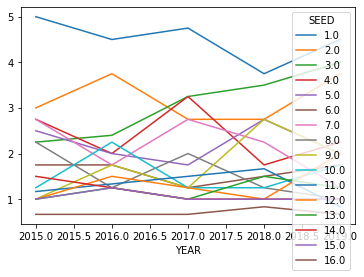

In [24]:
testing = rank_bb.groupby(['SEED', 'YEAR'])['MM_RANK'].mean()
print(testing)
testing= testing.unstack(level=0)
testing.plot()

Based on the line graph, we can see that the 1st seed consistently has the highest average March Madness Rank for the years 2015 through 2019. This means that all 4 1st seeds each year have consistently gone the farthest in the tournament compared to any other seeds. Additionally, the 16th seed has consistently had the lowest average March Madness rank, meaning that in most years between 2015-2019, the 16th seed has been eliminated in the first or second round. Something interesting to note is that the while 2nd and 3rd seeds do have the next highest average March Madness rank, seeds 4-15 are very close (between 2-3) in average March Madness Rank.

## Part 4: Classification & Modelling

Now with the insights gained from our Exploratory Data Analysis, we can use machine learning to try to predict a team's success in the March Madness tournament based on their regular season performance. 

We want to analyze the accuracy of our model by using Random Forest. Random Forest is one of the Ensemble Methods, and works by averaging many classification trees, each constructed by taking a random subset of the variables for each split in the tree. An advantage of using Random Forest is that it is great at predictive even when the data is very noisy. It is also good a not overfitting.

In order to train our dataset with the random forest classifier, we first need to adapt our dataframe and remove columns that contain Strings as well as columns that we found were not strong predictors. Now, we are left with what we consider to be the strongest predictors of a team's March Madness elimination round.

Additionally, we are going to split our dataset to generate testing and training data. We will use the training data to build our model, and the testing data to determine the accuracy of our model.

In [25]:
classification_data = rank_bb.drop(columns=['TEAM', 'CONFERENCE', 'MM ELIMINATION ROUND', 'FREE THROW RT', 'NUM GAMES PLAYED', 'NUM GAMES WON'])
x_train, x_test, y_train, y_test = train_test_split(classification_data, rank_bb['MM_RANK'], test_size = 0.3, random_state = 85) 
classification_data.head()

,ADJ OFFENSIVE EFFICIENCY,ADJ DEFENSIVE EFFICIENCY,FIELD GOAL %,TURNOVER RT,OFFENSIVE REBOUND RT,OFFENSIVE REBOUND RT ALLOWED,2 PT SHOOTING %,2 PT SHOOTING % ALLOWED,3 PT SHOOTING %,3 PT SHOOTING % ALLOWED,SEED,YEAR,GAME WIN %,DEFENSIVE REBOUND RT,MM_RANK
0,123.3,94.9,52.6,15.4,40.7,30.0,53.9,44.6,32.7,36.2,1.0,2016,0.825000,70.0,6.0
1,129.1,93.6,54.8,12.4,32.1,23.7,54.8,44.7,36.5,37.5,1.0,2015,0.900000,76.3,6.0
2,114.4,90.4,53.9,14.0,25.5,24.9,54.7,46.8,35.2,33.2,3.0,2018,0.825000,75.1,6.0
3,115.2,85.2,53.5,17.7,27.4,28.7,52.8,41.9,36.5,29.7,3.0,2019,0.815789,71.3,6.0
4,117.8,86.3,56.6,16.2,30.0,26.2,56.3,40.0,38.2,29.0,1.0,2017,0.948718,73.8,6.0


For Random Forest, there are a few hyperparameters that govern the accuracy of a classification model. The key parameters that need to be determined are a) the number of trees, and b) the variable subset size among other hyperparameters. These parameters can be modified to increase accuracy in a model, so that is what we will begin by doing.

After changing these hyperparameters, we can test the accuracy of our model when using with these different hyperparameters. If a certain hyperparameter modification that gives us high accuracy, then we know that we can use that to make our model optimized. 

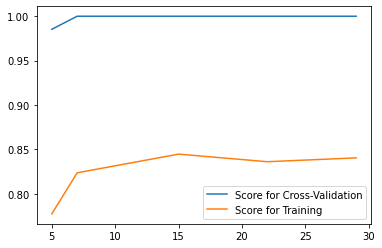

In [26]:
# We are going to plot our data using a few different max_depth values, so here we will try
# to plot a few max_depth values to find the optimal one
train_score, test_score = validation_curve(RandomForestClassifier(n_estimators = 200),
                                                 X = x_train, y = y_train, 
                                                 param_name = 'max_depth',
                                                 param_range = [5, 7, 15, 22, 29],
                                                 cv = 3)
plt.plot([5, 7, 15, 22, 29], np.mean(train_score, axis=1), label='Score for Cross-Validation')
plt.plot([5, 7, 15, 22, 29], np.mean(test_score, axis=1), label='Score for Training')
plt.legend()
plt.show()

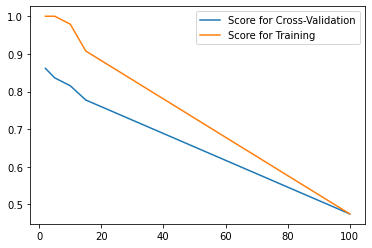

In [27]:
# We are going to plot our data using a few different min_samples_split values, so here we will try
# to plot a few minimum_samples_split values to find the optimal one
train_score, test_score = validation_curve(RandomForestClassifier(n_estimators = 200),
                                               X = x_train,
                                               y = y_train, 
                                               param_name = 'min_samples_split', 
                                               param_range = [2, 5, 10, 15, 100],
                                               cv = 3)
plt.plot([2, 5, 10, 15, 100], np.mean(test_score, axis=1), label='Score for Cross-Validation')
plt.plot([2, 5, 10, 15, 100], np.mean(train_score, axis=1), label='Score for Training')
plt.legend()
plt.show()

After training our model and observing the graphs for each of max_depth and min_samples_split, we can see that the best values are 5 and min_samples_split is 18.

In [28]:
# Create our classifer with optimized hyperparameters
rf = RandomForestClassifier(n_estimators = 200, max_depth = 5, min_samples_split = 18) 

With that out of the way, we are able to see if the Random Forest Model yielded an accurate classifier. To do this, we will perform a 5-fold cross validation. 

In [29]:
Random_Forest_Scores = cross_val_score(rf, classification_data, rank_bb['MM_RANK'], cv = 5)
Random_Forest_Scores

array([0.79411765, 0.82352941, 0.83823529, 0.76470588, 0.79411765])

Above, we can see that all models yield pretty high values for our 5-fold cross validation. To break down k-fold cross validation, it basically splits our data into k groups and uses all but 1 of the groups to train the data. Then it takes the last group and tests our model. Essentially, this means that our model is reasonably accurate in predicting the round of March Madness that a team will make it to. All of our tests yield a score of 0.779 or higher.

While our model could be more accurate (perhaps it could have a higher k-fold cross validation score), we can still see that our model is effective in its goal of predicting tournament disqualification round. We can reason that that our model is not perfectly effective (with a k-fold cross validation score closer to 1.00) because of variability in team performance from season to season. This includes player injury, new coach/management, home game vs away game, etc.

Furthermore, since we built our model with these predictors: ADJ OFFENSIVE EFFICIENCY, ADJ DEFENSIVE EFFICIENCY, FIELD GOAL %	TURNOVER RT	OFFENSIVE REBOUND RT, OFFENSIVE REBOUND RT ALLOWED, 2 PT SHOOTING %, 3 PT SHOOTING %, SEED, GAME WIN %, DEFENSIVE REBOUND RT, we can say that these variables are the strongest predictors for success in the tournament.

Perhaps with more data and training, we can build an even more robust model.

## Part 5: Conclusion & Other Insights

### Analysis Overview & Reflection

In this tutorial, we were able to:
- Create a dataframe from a csv, clean it, and prepare it for analysis.
- Use data visualization tools like violin plots, box plots, and OLS Regression models to gain insights on the strongest predictors of success in the March Madness tournament.
- Utilize machine learning and classification methods (Random Forest) to train our model and test its accuracy. 

Through our Exploratory Data Analysis, we identified the following variables: ADJ OFFENSIVE EFFICIENCY, ADJ DEFENSIVE EFFICIENCY, FIELD GOAL %	TURNOVER RT	OFFENSIVE REBOUND RT, OFFENSIVE REBOUND RT ALLOWED, 2 PT SHOOTING %, 3 PT SHOOTING %, SEED, GAME WIN %, DEFENSIVE REBOUND RT as our strongest predictors for determining how far a team will go during the March Madness tournament.

By using the Random Forest Classifer to train and test our model, we found that our model is reasonably accurate in predicting a teams' March Madness rank based on the strongest predictors mentioned above.

College basketball is ever changing as players come and go from teams on a yearly basis. However one thing that remains constant is the March Madness tournament (unless it is the year 2020). This tournament brings people from all over the country together to build brackets and make wagers on which Division 1 team basketball team will come out victorious. A team’s previous success can certainly be an important indicator of the future success. However due to the revolving door in collegiate basketball, a better indicator of a team's success in the tournament is how they competed throughout the season. So, in March when you fill out your bracket, make sure to take into consideration not only a team's reputation but also their season statistics.

## Work Cited


[1] Schwartz, Nick. "Duke Math Professor Says Odds of a Perfect Bracket are One in 2.4 Trillion". Duke Department of Mathematics. 17 March 2015. 21 December 2020.

[2] Ginsbach, Jay. "Sports Betting Explodes During March Madness". Forbes. 19 March 2019. 21 December 2020.

[3] NCAA. “Building the Bracket”. NCAA. 20 December 2020.

[4] Wilco, Daniel. “What is March Madness: The NCAA tournament explained”. NCAA. 20 April 2020. 21 December 2020.

[5] Sundberg, Andrew. “College Basketball Dataset”. Kaggle. 20 December 2020.

[6] Stojiljković, Mirko. "The Pandas DataFrame: Make Working With Data Delightful" RealPython. 22 Paril 2020. 21 December 2020.

[7] Koehrsen, Will. "Hyperparameter Tuning the Random Forest in Python" Towards Data Science. 9 January 2018. 21 December 2020.

[8] Brownlee, Jason. "How to Develop a Random Forest Ensemble in Python" Machine Learning Mastery. 20 April 2020. 21 December 2020.